In [23]:
import pandas as pd
import numpy as np
fl = pd.read_csv('flights.csv')
fl = pd.DataFrame(fl)
flights = pd.read_csv('flightsbyWWpart2.csv')
flights = pd.DataFrame(flights)
aircraft = pd.read_csv('aircraftdetails.csv')
aircraft = pd.DataFrame(aircraft)

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
fl = fl[fl['DIVERTED'] == 0]
fl = fl[fl['CANCELLED'] == 0]

In [35]:
fl.reset_index(inplace=True)

In [43]:
fl2 = fl['SCHEDULED_DEPARTURE']
fl2 = pd.DataFrame(fl2)
fl3 = fl2['SCHEDULED_DEPARTURE'].map(lambda x: str(x)[:-2])

In [57]:
fl3 = pd.DataFrame(fl3)

In [51]:
fl3 = fl3['SCHEDULED_DEPARTURE'].replace(to_replace="", value=0)

In [95]:
fl3.tail()

,SCHEDULED_DEPARTURE
5714003,23
5714004,23
5714005,23
5714006,23
5714007,23


In [80]:
flights1 = flights[['AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'ARRIVAL_DELAY', 'DAY_COUNT']]
aircraft1 = aircraft[['N-NUMBER', 'YEAR MFR', 'NO-SEATS']]

In [100]:
flights1.tail()

,AIRLINE,N-NUMBER,ORIGIN_AIRPORT,ARRIVAL_DELAY,DAY_COUNT
5714003,B6,657JB,LAX,-26.0,365
5714004,B6,828JB,JFK,-16.0,365
5714005,B6,913JB,JFK,-8.0,365
5714006,B6,527JB,MCO,-10.0,365
5714007,B6,534JB,JFK,2.0,365


In [101]:
flights1 = flights1.join(fl3, how='left')

In [102]:
flights1.tail()

,AIRLINE,N-NUMBER,ORIGIN_AIRPORT,ARRIVAL_DELAY,DAY_COUNT,SCHEDULED_DEPARTURE
5714003,B6,657JB,LAX,-26.0,365,23
5714004,B6,828JB,JFK,-16.0,365,23
5714005,B6,913JB,JFK,-8.0,365,23
5714006,B6,527JB,MCO,-10.0,365,23
5714007,B6,534JB,JFK,2.0,365,23


In [82]:
flights1['TAIL_NUMBER'] = flights['TAIL_NUMBER'].map(lambda x: x.lstrip('N'))
#kaggle_unique1['MFR MDL CODE'] = kaggle_unique1['MFR MDL CODE'].map(lambda x: str(x)[:-2])


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [103]:
flights1 = flights1.rename(columns={'TAIL_NUMBER':'N-NUMBER'})

In [104]:
flights3 = flights1.merge(aircraft1, on='N-NUMBER', how='left')

In [106]:
flights3.tail()

,AIRLINE,N-NUMBER,ORIGIN_AIRPORT,ARRIVAL_DELAY,DAY_COUNT,SCHEDULED_DEPARTURE,YEAR MFR,NO-SEATS
5715303,B6,657JB,LAX,-26.0,365,23,2007,147.0
5715304,B6,828JB,JFK,-16.0,365,23,2013,147.0
5715305,B6,913JB,JFK,-8.0,365,23,2013,147.0
5715306,B6,527JB,MCO,-10.0,365,23,NaN,NaN
5715307,B6,534JB,JFK,2.0,365,23,2002,345.0


In [108]:
flights3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5715308 entries, 0 to 5715307
Data columns (total 8 columns):
AIRLINE                object
N-NUMBER               object
ORIGIN_AIRPORT         object
ARRIVAL_DELAY          float64
DAY_COUNT              int64
SCHEDULED_DEPARTURE    object
YEAR MFR               object
NO-SEATS               float64
dtypes: float64(2), int64(1), object(5)
memory usage: 392.4+ MB


<IPython.core.display.Javascript object>


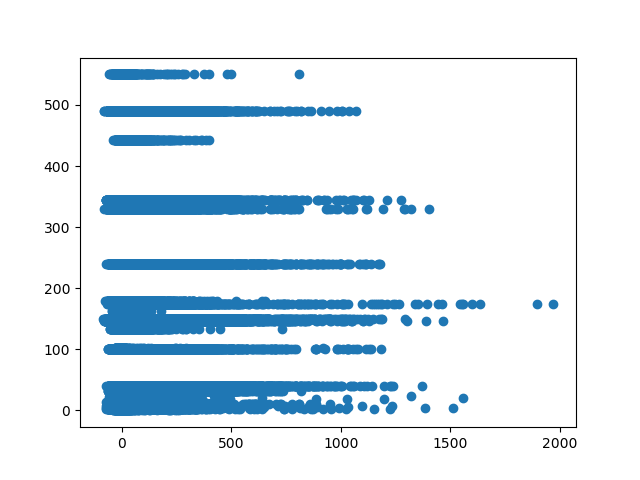

In [117]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()
plt.scatter(flights3['ARRIVAL_DELAY'], flights3['NO-SEATS'])

In [122]:
fig2 = plt.figure()


773550